In [1]:
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt

### Infer a Poisson rate

In [2]:
def PoissonRate(r, T, n):
    return ((r*T)**n * np.exp(-r*T))/factorial(n)

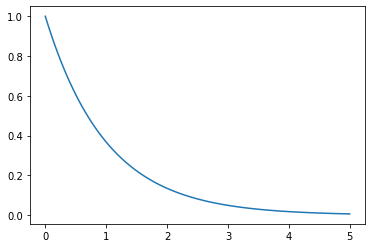

In [3]:
T = 1. # Observation time
n = 0. # Observed events
r = np.linspace(0, 5, num=100, endpoint=True)
f = PoissonRate(r, T, n)
plt.plot(r,PoissonRate(r, T, n))
plt.show()

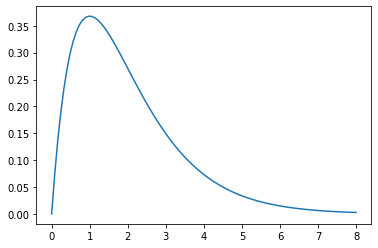

In [4]:
T = 1. # Observation time
n = 1. # Observed events
r = np.linspace(0, 8, num=100, endpoint=True)
f = PoissonRate(r, T, n)
plt.plot(r,PoissonRate(r, T, n))
plt.show()

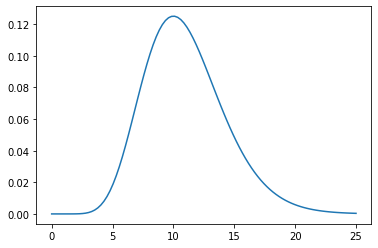

In [5]:
T = 1. # Observation time
n = 10. # Observed events
r = np.linspace(0, 25, num=100, endpoint=True)
f = PoissonRate(r, T, n)
plt.plot(r,PoissonRate(r, T, n))
plt.show()

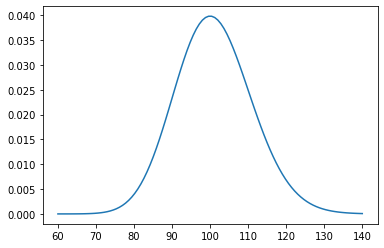

In [6]:
T = 1. # Observation time
n = 100. # Observed events
r = np.linspace(60, 140, num=100, endpoint=True)
f = PoissonRate(r, T, n)
plt.plot(r,PoissonRate(r, T, n))
plt.show()

### Estimating the source rate

In [7]:
def C(i, Non, Noff, Ton, Toff):
    '''probability that i of the ON measurement events are due to the source'''
    denominator=0
    for j in range (0,Non+1):
        denominator += ((1+(Toff/Ton))**j * factorial(Non+Noff-j)/factorial(Non-j) )
    return ((1+(Toff/Ton))**i * factorial(Non+Noff-i)/factorial(Non-i)) / denominator

def SourceRate(s, Non, Noff, Ton, Toff):
    PsNon = 0 
    for i in range (0,Non+1):
        PsNon += C(i, Non, Noff, Ton, Toff) * ( (s*Ton)**i * np.exp(-s*Ton) ) / (factorial(i))
    return Ton*PsNon

In [8]:
ss = np.linspace(0, 16, num=50, endpoint=True)
PsNon8311 = []
for s in ss:
    PsNon8311.append(SourceRate(s, 8, 3, 1, 1)) # s, Non, Noff, Ton, Toff
PsNon836112 = []
for s in ss:
    PsNon836112.append(SourceRate(s, 8, 36, 1, 12)) # s, Non, Noff, Ton, Toff
PsNon24933 = []
for s in ss:
    PsNon24933.append(SourceRate(s, 24, 9, 3, 3)) # s, Non, Noff, Ton, Toff
PsNon2311 = []
for s in ss:
    PsNon2311.append(SourceRate(s, 2, 3, 1, 1)) # s, Non, Noff, Ton, Toff

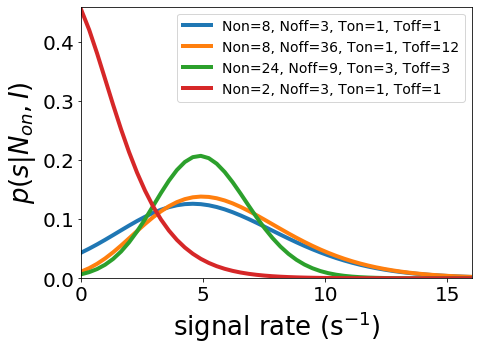

In [9]:
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(ss,PsNon8311,linewidth=4.0,label='Non=8, Noff=3, Ton=1, Toff=1')
ax.plot(ss,PsNon836112,linewidth=4.0,label='Non=8, Noff=36, Ton=1, Toff=12')
ax.plot(ss,PsNon24933,linewidth=4.0,label='Non=24, Noff=9, Ton=3, Toff=3')
ax.plot(ss,PsNon2311,linewidth=4.0,label='Non=2, Noff=3, Ton=1, Toff=1')
# ornaments
ax.set_xlim(0,16)
ax.set_ylim(0,0.46)
ax.set_xlabel('signal rate (s$^{-1}$)',fontsize=26)
ax.set_ylabel('$p(s|N_{on},I)$',fontsize=26)
ax.tick_params(axis='both', labelsize=20)
ax.legend(fontsize=14)
plt.show()
fig.savefig('signal_rate.pdf',bbox_inches='tight',dpi=300)
plt.close(fig)

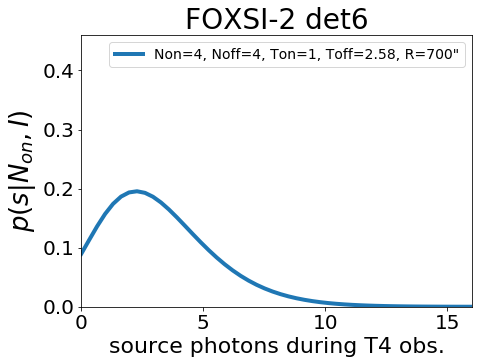

In [10]:
# FOXSI-2 Det6
FToff = 2.5818
PsNon4511 = []
for s in ss:
    PsNon4511.append(SourceRate(s, 4, 4, 1, FToff)) # s, Non, Noff, Ton, Toff

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(ss,PsNon4511,linewidth=4.0,label='Non=4, Noff=4, Ton=1, Toff='+str(round(FToff,2))+', R=700"')
# ornaments
ax.set_xlim(0,16)
ax.set_ylim(0,0.46)
ax.set_xlabel('source photons during T4 obs.',fontsize=22)
ax.set_ylabel('$p(s|N_{on},I)$',fontsize=26)
ax.tick_params(axis='both', labelsize=20)
ax.set_title('FOXSI-2 det6',fontsize=28)
ax.legend(fontsize=14)
plt.show()
fig.savefig('Fsignal_rate.pdf',bbox_inches='tight',dpi=300)
plt.close(fig)

### Probability of attributing at least one of the Non photons to the source

In [11]:
def pge1(Non, Noff, Ton, Toff):
    '''Probability of attributing at least one of the Non photons to the source'''
    denominator=0
    for j in range (0,Non+1):
        denominator += ((1+(Toff/Ton))**j * factorial(Non+Noff-j)/factorial(Non-j) )
    numerator=0
    for i in range (1,Non+1):
        numerator += ((1+(Toff/Ton))**i * factorial(Non+Noff-i)/factorial(Non-i))
    return numerator / denominator

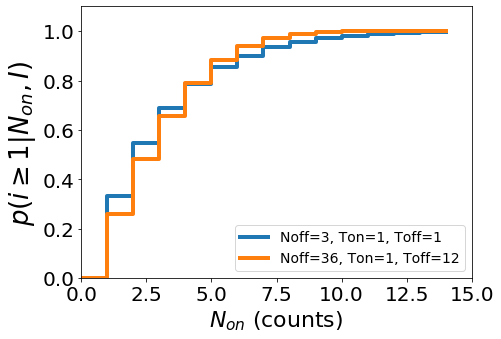

In [12]:
Nons = np.arange(0,15)
pge1_311 = []
for Non in Nons:
    pge1_311.append(pge1( Non, 3, 1, 1)) # Non, Noff, Ton, Toff
pge1_36112 = []
for Non in Nons:
    pge1_36112.append(pge1( Non, 36, 1, 12)) # Non, Noff, Ton, Toff

fig, ax = plt.subplots(figsize=(7,5))
ax.step(Nons,pge1_311, where='post',linewidth=4.0,label='Noff=3, Ton=1, Toff=1')
ax.step(Nons,pge1_36112, where='post',linewidth=4.0,label='Noff=36, Ton=1, Toff=12')
# ornaments
ax.set_xlim(0,15)
ax.set_ylim(0,1.1)
ax.set_xlabel('$N_{on}$ (counts)',fontsize=22)
ax.set_ylabel('$p(i\geq 1 |N_{on},I)$',fontsize=26)
ax.tick_params(axis='both', labelsize=20)
ax.legend(fontsize=14,loc='best')
plt.show()
fig.savefig('atleastone.pdf',bbox_inches='tight',dpi=300)
plt.close(fig)

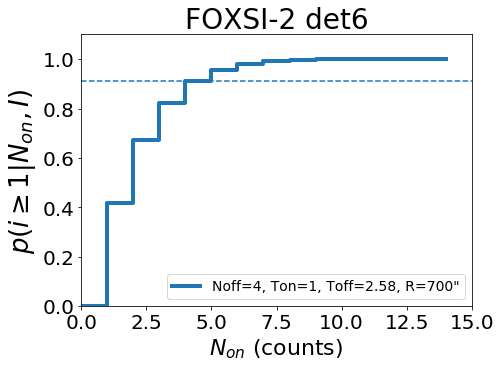

In [13]:
# FOXSI-2 Det6
pge1_411 = []
for Non in Nons:
    pge1_411.append(pge1( Non, 4, 1, FToff)) # Non, Noff, Ton, Toff
pge1_311 = []
for Non in Nons:
    pge1_311.append(pge1( Non, 3, 1, FToff)) # Non, Noff, Ton, Toff

fig, ax = plt.subplots(figsize=(7,5))
ax.step(Nons,pge1_411, where='post',linewidth=4.0,label='Noff=4, Ton=1, Toff='+str(round(FToff,2))+', R=700"')
#ax.step(Nons,pge1_311, where='post',linewidth=4.0,label='Noff=3, Ton=1, Toff='+str(round(FToff,2))+', R=600"')
ax.axhline(pge1( 4, 4, 1, FToff),color='tab:blue',ls='--')
#ax.axhline(pge1( 6, 3, 1, FToff),color='tab:orange',ls='--')
# ornaments
ax.set_xlim(0,15)
ax.set_ylim(0,1.1)
ax.set_xlabel('$N_{on}$ (counts)',fontsize=22)
ax.set_ylabel('$p(i\geq 1 |N_{on},I)$',fontsize=26)
ax.tick_params(axis='both', labelsize=20)
ax.set_title('FOXSI-2 det6',fontsize=28)
ax.legend(fontsize=14,loc='best')
plt.show()
fig.savefig('Fatleastone.pdf',bbox_inches='tight',dpi=300)
plt.close(fig)

### Source detection question

In [14]:
def pMsb(smax, Non, Noff, Ton, Toff):
    '''Probability that model Msbb is true'''
    dummy = 0
    for i in range(0,Non+1):
        dummy += ((1+(Toff/Ton))**i * factorial(Non+Noff-i)/factorial(Non-i))
    Osbb = ( factorial(Non) / (smax * Ton * factorial(Non+Noff)) ) * dummy
    return 1. / (1. + (1./Osbb))

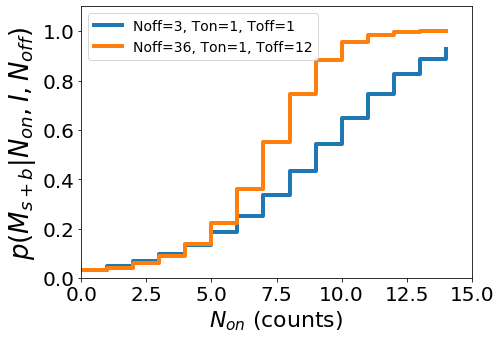

In [15]:
smax = 30.
pMsb_311 = []
for Non in Nons:
    pMsb_311.append(pMsb(smax, Non, 3, 1, 1)) # Non, Noff, Ton, Toff
pMsb_36112 = []
for Non in Nons:
    pMsb_36112.append(pMsb(smax, Non, 36, 1, 12)) # Non, Noff, Ton, Toff

fig, ax = plt.subplots(figsize=(7,5))
ax.step(Nons,pMsb_311, where='post',linewidth=4.0,label='Noff=3, Ton=1, Toff=1')
ax.step(Nons,pMsb_36112, where='post',linewidth=4.0,label='Noff=36, Ton=1, Toff=12')
# ornaments
ax.set_xlim(0,15)
ax.set_ylim(0,1.1)
ax.set_xlabel('$N_{on}$ (counts)',fontsize=22)
ax.set_ylabel('$p(M_{s+b} |N_{on},I, N_{off})$',fontsize=26)
ax.tick_params(axis='both', labelsize=20)
ax.legend(fontsize=14,loc='best')
plt.show()
fig.savefig('MsbTrue.pdf',bbox_inches='tight',dpi=300)
plt.close(fig)

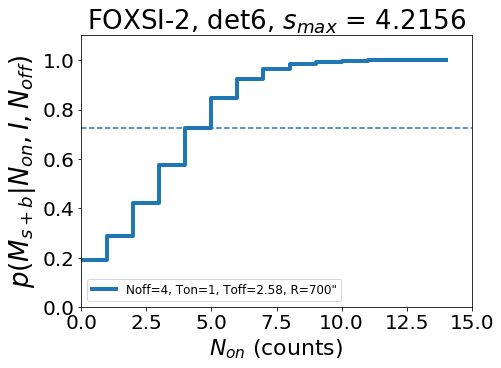

In [16]:
# FOXSI-2 Det6
smax = 4.2156
pMsb_411 = []
for Non in Nons:
    pMsb_411.append(pMsb(smax, Non, 4, 1, FToff)) # Non, Noff, Ton, Toff
pMsb_311 = []
for Non in Nons:
    pMsb_311.append(pMsb(smax, Non, 3, 1, FToff)) # Non, Noff, Ton, Toff

fig, ax = plt.subplots(figsize=(7,5))
ax.step(Nons,pMsb_411, where='post',linewidth=4.0,label='Noff=4, Ton=1, Toff='+str(round(FToff,2))+', R=700"')
#ax.step(Nons,pMsb_311, where='post',linewidth=4.0,label='Noff=3, Ton=1, Toff='+str(round(FToff,2))+', R=600"')
ax.axhline(pMsb(smax, 4, 4, 1, FToff),color='tab:blue',ls='--')
#ax.axhline(pMsb(smax, 6, 3, 1, FToff),color='tab:orange',ls='--')
# ornaments
ax.set_xlim(0,15)
ax.set_ylim(0,1.1)
ax.set_xlabel('$N_{on}$ (counts)',fontsize=22)
ax.set_ylabel('$p(M_{s+b} |N_{on},I, N_{off})$',fontsize=26)
ax.tick_params(axis='both', labelsize=20)
ax.set_title('FOXSI-2, det6, $s_{max}$ = '+str(smax),fontsize=26)
ax.legend(fontsize=12,loc='best')
plt.show()
fig.savefig('FMsbTrue.pdf',bbox_inches='tight',dpi=300)
plt.close(fig)

In [17]:
pMsb(smax, 4, 4, 1, FToff)

0.7260678503157056

#### Flux distribution function plot 

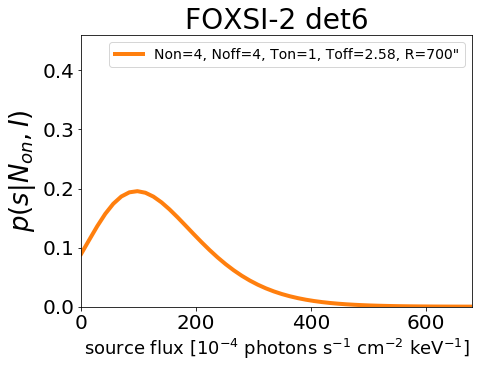

In [18]:
# FOXSI-2 Det6
FToff = 2.5818
fluxes = (ss * 723822.9e4 )/ ((92.7 * 0.174) * (5) * (16.67) * 125815.6)
PsNonFlux = []
for s in ss:
    PsNonFlux.append(SourceRate(s, 4, 4, 1, FToff)) # s, Non, Noff, Ton, Toff

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(fluxes,PsNonFlux,linewidth=4.0,color='tab:orange',label='Non=4, Noff=4, Ton=1, Toff='+str(round(FToff,2))+', R=700"')
# ornaments
ax.set_xlim(0,680)
ax.set_ylim(0,0.46)
ax.set_xlabel('source flux [10$^{-4}$ photons s$^{-1}$ cm$^{-2}$ keV$^{-1}$]',fontsize=18)
ax.set_ylabel('$p(s|N_{on},I)$',fontsize=26)
ax.tick_params(axis='both', labelsize=20)
ax.set_title('FOXSI-2 det6',fontsize=28)
ax.legend(fontsize=14)
plt.show()
fig.savefig('Fflux_rate.pdf',bbox_inches='tight',dpi=300)
plt.close(fig)

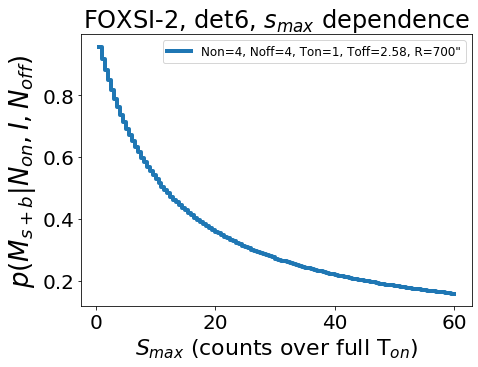

In [19]:
# Smax Dependence
Smaxs = np.linspace(0.5, 60, num=120, endpoint=True)
pMsb_smax = []
for smax in Smaxs:
    pMsb_smax.append(pMsb(smax, 4, 4, 1, FToff)) # Non, Noff, Ton, Toff

fig, ax = plt.subplots(figsize=(7,5))
ax.step(Smaxs,pMsb_smax, where='post',linewidth=4.0,label='Non=4, Noff=4, Ton=1, Toff='+str(round(FToff,2))+', R=700"')
# ornaments
#ax.set_xlim(0,15)
#ax.set_ylim(0,1.1)
ax.set_xlabel('$S_{max}$ (counts over full T$_{on}$)',fontsize=22)
ax.set_ylabel('$p(M_{s+b} |N_{on},I, N_{off})$',fontsize=26)
ax.tick_params(axis='both', labelsize=20)
ax.set_title('FOXSI-2, det6, $s_{max}$ dependence',fontsize=24)
ax.legend(fontsize=12,loc='best')
plt.show()
fig.savefig('SmaxDependence.pdf',bbox_inches='tight',dpi=300)
plt.close(fig)

## Sequencial Monte Carlo

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm

In [21]:
# background only
Noff = 4 # total OFF observed event
Toff = 2.5818
model_b = pm.Model()
with model_b:
    b   = pm.Uniform('b', lower=0, upper=20)
    p_b = pm.Poisson('p_b', mu=b, observed=Noff)
    stepNUTS = pm.NUTS() # kind of step: No U turns
    trace_b = pm.sample(20000, step=stepNUTS, cores = 2, chains = 2, tune=500)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b]
Sampling 2 chains, 0 divergences: 100%|██████████| 41000/41000 [00:19<00:00, 2143.80draws/s]


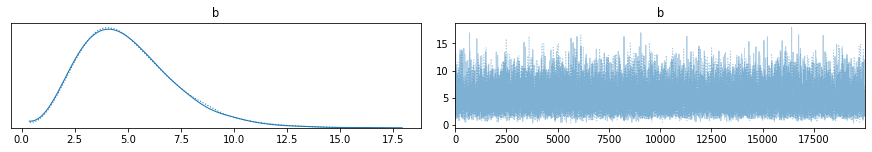

In [22]:
pm.traceplot(trace_b);
plt.savefig('tmp.pdf',bbox_inches='tight',dpi=300)

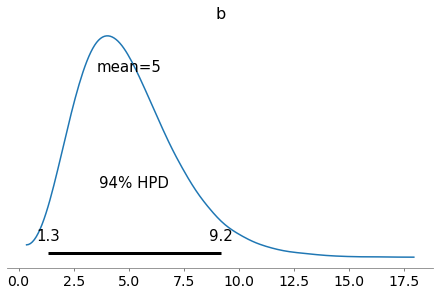

In [23]:
pm.plot_posterior(trace_b);
plt.savefig('tmp.pdf',bbox_inches='tight',dpi=300)

In [24]:
trace_b['b'].mean()

4.999970915842445

In [25]:
# background and signal
Non  = 4 # total ON  observed event
Noff = 4 # total OFF observed event
Ton  = 1
Toff = 2.5818
smax = 4.2156
model_b_s = pm.Model()
with model_b_s:
    b = pm.Poisson('b', mu=(Noff+1) )
    s = pm.Uniform('s', lower=0, upper=smax)
    p_b_s = pm.Poisson('p_b_s', mu=b*Ton/Toff+s, observed=Non)
    stepNUTS = pm.NUTS() # kind of step: No U turns
    trace_b_s = pm.sample(40000, step=stepNUTS, cores = 4, chains = 4, tune=500)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [s]
>Metropolis: [b]
Sampling 4 chains, 0 divergences: 100%|██████████| 162000/162000 [01:31<00:00, 1773.40draws/s]
The number of effective samples is smaller than 25% for some parameters.


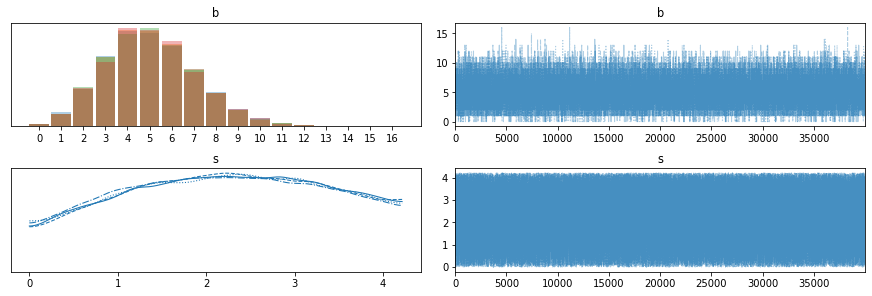

In [26]:
pm.traceplot(trace_b_s);

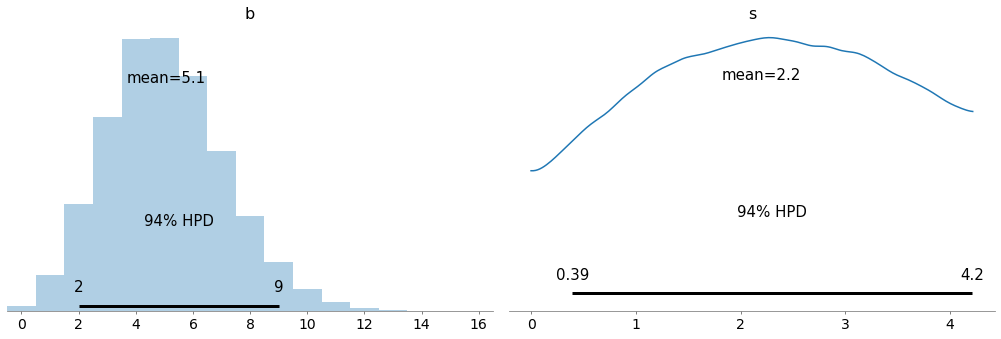

In [27]:
pm.plot_posterior(trace_b_s);
plt.savefig('tmp.pdf',bbox_inches='tight',dpi=300)

## Bayes Factor

In [28]:
def pMsbMC(smax, Non, Noff, Ton, Toff):
    Sources = ( False, True )
    models = []
    traces = []
    for Source in Sources:
        print('Source={0}, Non={1}, Noff={2}, Ton={3}, Toff={4}'.format(Source, Non, Noff, Ton, Toff))
        with pm.Model() as model:
            if not Source:
                b = pm.Uniform('b', lower=0, upper=Noff + 2.*np.sqrt(Noff+1))
                s = 0.0
            if Source:
                b = pm.Poisson('b', mu=(Noff+1) )
                s = pm.Uniform('s', lower=0, upper=smax)

            p_b_s = pm.Poisson('p_b_s', mu=b*Ton/Toff+s, observed=Non)
            trace = pm.sample_smc(2000, random_seed=42)
            models.append(model)
            traces.append(trace)
    B = models[1].marginal_likelihood / models[0].marginal_likelihood
    return 1/(1. + 1/B)

In [29]:
smax = 30.
pMsb_311 = []
for Non in Nons:
    pMsb_311.append(pMsb(smax, Non, 3, 1, 1)) # Non, Noff, Ton, Toff
pMsb_36112 = []
for Non in Nons:
    pMsb_36112.append(pMsb(smax, Non, 36, 1, 12)) # Non, Noff, Ton, Toff

Sim_p_Msbs_36112 = []
for Non in Nons:
    Sim_p_Msbs_36112.append(pMsbMC(smax, Non, 36, 1, 12))

Sim_p_Msbs_311 = []
for Non in Nons:
    Sim_p_Msbs_311.append(pMsbMC(smax, Non, 3, 1, 1))

Source=False, Non=0, Noff=36, Ton=1, Toff=12


Sample initial stage: ...
Stage:   0 Beta: 0.951 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.687


Source=True, Non=0, Noff=36, Ton=1, Toff=12


Sample initial stage: ...
Stage:   0 Beta: 0.129 Steps:  25 Acce: 1.000
Stage:   1 Beta: 0.433 Steps:  25 Acce: 0.543
Stage:   2 Beta: 1.000 Steps:   5 Acce: 0.440
Sample initial stage: ...


Source=False, Non=1, Noff=36, Ton=1, Toff=12


Stage:   0 Beta: 1.000 Steps:  25 Acce: 1.000


Source=True, Non=1, Noff=36, Ton=1, Toff=12


Sample initial stage: ...
Stage:   0 Beta: 0.144 Steps:  25 Acce: 1.000
Stage:   1 Beta: 0.517 Steps:  25 Acce: 0.544
Stage:   2 Beta: 1.000 Steps:   5 Acce: 0.433
Sample initial stage: ...


Source=False, Non=2, Noff=36, Ton=1, Toff=12


Stage:   0 Beta: 1.000 Steps:  25 Acce: 1.000
Sample initial stage: ...


Source=True, Non=2, Noff=36, Ton=1, Toff=12


Stage:   0 Beta: 0.162 Steps:  25 Acce: 1.000
Stage:   1 Beta: 0.629 Steps:  25 Acce: 0.541
Stage:   2 Beta: 1.000 Steps:   5 Acce: 0.426


Source=False, Non=3, Noff=36, Ton=1, Toff=12


Sample initial stage: ...
Stage:   0 Beta: 1.000 Steps:  25 Acce: 1.000


Source=True, Non=3, Noff=36, Ton=1, Toff=12


Sample initial stage: ...
Stage:   0 Beta: 0.185 Steps:  25 Acce: 1.000
Stage:   1 Beta: 0.803 Steps:  25 Acce: 0.542
Stage:   2 Beta: 1.000 Steps:   5 Acce: 0.410


Source=False, Non=4, Noff=36, Ton=1, Toff=12


Sample initial stage: ...
Stage:   0 Beta: 1.000 Steps:  25 Acce: 1.000


Source=True, Non=4, Noff=36, Ton=1, Toff=12


Sample initial stage: ...
Stage:   0 Beta: 0.214 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.541


Source=False, Non=5, Noff=36, Ton=1, Toff=12


Sample initial stage: ...
Stage:   0 Beta: 1.000 Steps:  25 Acce: 1.000


Source=True, Non=5, Noff=36, Ton=1, Toff=12


Sample initial stage: ...
Stage:   0 Beta: 0.253 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.541
Sample initial stage: ...


Source=False, Non=6, Noff=36, Ton=1, Toff=12


Stage:   0 Beta: 0.729 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.666
Sample initial stage: ...


Source=True, Non=6, Noff=36, Ton=1, Toff=12


Stage:   0 Beta: 0.306 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.537
Sample initial stage: ...


Source=False, Non=7, Noff=36, Ton=1, Toff=12


Stage:   0 Beta: 0.559 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.660


Source=True, Non=7, Noff=36, Ton=1, Toff=12


Sample initial stage: ...
Stage:   0 Beta: 0.374 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.525
Sample initial stage: ...


Source=False, Non=8, Noff=36, Ton=1, Toff=12


Stage:   0 Beta: 0.453 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.660


Source=True, Non=8, Noff=36, Ton=1, Toff=12


Sample initial stage: ...
Stage:   0 Beta: 0.452 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.534


Source=False, Non=9, Noff=36, Ton=1, Toff=12


Sample initial stage: ...
Stage:   0 Beta: 0.381 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.661
Sample initial stage: ...


Source=True, Non=9, Noff=36, Ton=1, Toff=12


Stage:   0 Beta: 0.529 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.538


Source=False, Non=10, Noff=36, Ton=1, Toff=12


Sample initial stage: ...
Stage:   0 Beta: 0.329 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.661


Source=True, Non=10, Noff=36, Ton=1, Toff=12


Sample initial stage: ...
Stage:   0 Beta: 0.598 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.530


Source=False, Non=11, Noff=36, Ton=1, Toff=12


Sample initial stage: ...
Stage:   0 Beta: 0.289 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.663


Source=True, Non=11, Noff=36, Ton=1, Toff=12


Sample initial stage: ...
Stage:   0 Beta: 0.656 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.531


Source=False, Non=12, Noff=36, Ton=1, Toff=12


Sample initial stage: ...
Stage:   0 Beta: 0.258 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.663


Source=True, Non=12, Noff=36, Ton=1, Toff=12


Sample initial stage: ...
Stage:   0 Beta: 0.708 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.535


Source=False, Non=13, Noff=36, Ton=1, Toff=12


Sample initial stage: ...
Stage:   0 Beta: 0.233 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.662


Source=True, Non=13, Noff=36, Ton=1, Toff=12


Sample initial stage: ...
Stage:   0 Beta: 0.758 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.537
Sample initial stage: ...


Source=False, Non=14, Noff=36, Ton=1, Toff=12


Stage:   0 Beta: 0.212 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.661
Stage:   2 Beta: 1.000 Steps:   4 Acce: 0.559


Source=True, Non=14, Noff=36, Ton=1, Toff=12


Sample initial stage: ...
Stage:   0 Beta: 0.805 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.544
Sample initial stage: ...


Source=False, Non=0, Noff=3, Ton=1, Toff=1


Stage:   0 Beta: 0.545 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.687


Source=True, Non=0, Noff=3, Ton=1, Toff=1


Sample initial stage: ...
Stage:   0 Beta: 0.119 Steps:  25 Acce: 1.000
Stage:   1 Beta: 0.350 Steps:  25 Acce: 0.532
Stage:   2 Beta: 0.770 Steps:   6 Acce: 0.410
Stage:   3 Beta: 1.000 Steps:   8 Acce: 0.326
Sample initial stage: ...


Source=False, Non=1, Noff=3, Ton=1, Toff=1


Stage:   0 Beta: 1.000 Steps:  25 Acce: 1.000


Source=True, Non=1, Noff=3, Ton=1, Toff=1


Sample initial stage: ...
Stage:   0 Beta: 0.133 Steps:  25 Acce: 1.000
Stage:   1 Beta: 0.425 Steps:  25 Acce: 0.531
Stage:   2 Beta: 1.000 Steps:   6 Acce: 0.414


Source=False, Non=2, Noff=3, Ton=1, Toff=1


Sample initial stage: ...
Stage:   0 Beta: 1.000 Steps:  25 Acce: 1.000


Source=True, Non=2, Noff=3, Ton=1, Toff=1


Sample initial stage: ...
Stage:   0 Beta: 0.150 Steps:  25 Acce: 1.000
Stage:   1 Beta: 0.521 Steps:  25 Acce: 0.519
Stage:   2 Beta: 1.000 Steps:   6 Acce: 0.410
Sample initial stage: ...


Source=False, Non=3, Noff=3, Ton=1, Toff=1


Stage:   0 Beta: 1.000 Steps:  25 Acce: 1.000
Sample initial stage: ...


Source=True, Non=3, Noff=3, Ton=1, Toff=1


Stage:   0 Beta: 0.170 Steps:  25 Acce: 1.000
Stage:   1 Beta: 0.702 Steps:  25 Acce: 0.520
Stage:   2 Beta: 1.000 Steps:   6 Acce: 0.416
Sample initial stage: ...


Source=False, Non=4, Noff=3, Ton=1, Toff=1


Stage:   0 Beta: 1.000 Steps:  25 Acce: 1.000
Sample initial stage: ...


Source=True, Non=4, Noff=3, Ton=1, Toff=1


Stage:   0 Beta: 0.196 Steps:  25 Acce: 1.000
Stage:   1 Beta: 0.930 Steps:  25 Acce: 0.524
Stage:   2 Beta: 1.000 Steps:   6 Acce: 0.408
Sample initial stage: ...


Source=False, Non=5, Noff=3, Ton=1, Toff=1


Stage:   0 Beta: 1.000 Steps:  25 Acce: 1.000


Source=True, Non=5, Noff=3, Ton=1, Toff=1


Sample initial stage: ...
Stage:   0 Beta: 0.228 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.523
Sample initial stage: ...


Source=False, Non=6, Noff=3, Ton=1, Toff=1


Stage:   0 Beta: 1.000 Steps:  25 Acce: 1.000


Source=True, Non=6, Noff=3, Ton=1, Toff=1


Sample initial stage: ...
Stage:   0 Beta: 0.268 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.521
Sample initial stage: ...


Source=False, Non=7, Noff=3, Ton=1, Toff=1


Stage:   0 Beta: 1.000 Steps:  25 Acce: 1.000


Source=True, Non=7, Noff=3, Ton=1, Toff=1


Sample initial stage: ...
Stage:   0 Beta: 0.317 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.514
Sample initial stage: ...


Source=False, Non=8, Noff=3, Ton=1, Toff=1


Stage:   0 Beta: 0.738 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.667
Sample initial stage: ...


Source=True, Non=8, Noff=3, Ton=1, Toff=1


Stage:   0 Beta: 0.377 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.518
Sample initial stage: ...


Source=False, Non=9, Noff=3, Ton=1, Toff=1


Stage:   0 Beta: 0.562 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.669


Source=True, Non=9, Noff=3, Ton=1, Toff=1


Sample initial stage: ...
Stage:   0 Beta: 0.446 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.511
Sample initial stage: ...


Source=False, Non=10, Noff=3, Ton=1, Toff=1


Stage:   0 Beta: 0.455 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.669


Source=True, Non=10, Noff=3, Ton=1, Toff=1


Sample initial stage: ...
Stage:   0 Beta: 0.519 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.514
Sample initial stage: ...


Source=False, Non=11, Noff=3, Ton=1, Toff=1


Stage:   0 Beta: 0.382 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.665


Source=True, Non=11, Noff=3, Ton=1, Toff=1


Sample initial stage: ...
Stage:   0 Beta: 0.589 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.511
Sample initial stage: ...


Source=False, Non=12, Noff=3, Ton=1, Toff=1


Stage:   0 Beta: 0.330 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.663


Source=True, Non=12, Noff=3, Ton=1, Toff=1


Sample initial stage: ...
Stage:   0 Beta: 0.652 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.518
Sample initial stage: ...


Source=False, Non=13, Noff=3, Ton=1, Toff=1


Stage:   0 Beta: 0.290 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.661
Sample initial stage: ...


Source=True, Non=13, Noff=3, Ton=1, Toff=1


Stage:   0 Beta: 0.713 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.519
Sample initial stage: ...


Source=False, Non=14, Noff=3, Ton=1, Toff=1


Stage:   0 Beta: 0.258 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.660
Sample initial stage: ...


Source=True, Non=14, Noff=3, Ton=1, Toff=1


Stage:   0 Beta: 0.771 Steps:  25 Acce: 1.000
Stage:   1 Beta: 1.000 Steps:  25 Acce: 0.535


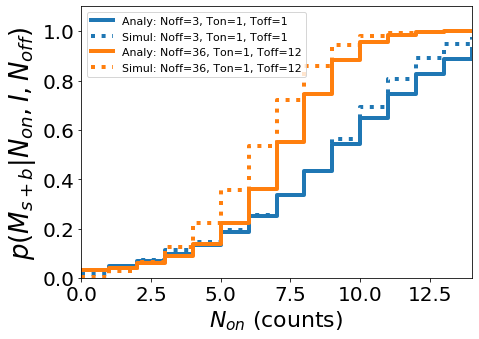

In [30]:
# Plot from book:
fig, ax = plt.subplots(figsize=(7,5))
ax.step(Nons,pMsb_311, where='post',linewidth=4.0,color='tab:blue',label='Analy: Noff=3, Ton=1, Toff=1')
ax.step(Nons,Sim_p_Msbs_311, linestyle='dotted', where='post',color='tab:blue',linewidth=4.0,label='Simul: Noff=3, Ton=1, Toff=1')
ax.step(Nons,pMsb_36112, where='post',linewidth=4.0,color='tab:orange',label='Analy: Noff=36, Ton=1, Toff=12')
ax.step(Nons,Sim_p_Msbs_36112, linestyle='dotted',where='post',linewidth=4.0,color='tab:orange',label='Simul: Noff=36, Ton=1, Toff=12')
# ornaments
ax.set_xlim(0,14)
ax.set_ylim(0,1.1)
ax.set_xlabel('$N_{on}$ (counts)',fontsize=22)
ax.set_ylabel('$p(M_{s+b} |N_{on},I, N_{off})$',fontsize=26)
ax.tick_params(axis='both', labelsize=20)
ax.legend(fontsize=11,loc='best')
plt.show()
fig.savefig('MsbTrueSim.pdf',bbox_inches='tight',dpi=300)
plt.close(fig)

In [ ]:
Fsmax = 30
#Fsmax = 4.2156
FNon = 4
FNoff = 4
FTon = 1
FToff = 2.5818
# FOXSI Analytical confidence
FpAna = pMsb(Fsmax, FNon, FNoff, FTon, FToff) # smax, Non, Noff, Ton, Toff
FpSim = pMsbMC(Fsmax, FNon, FNoff, FTon, FToff) # Non, Noff, Ton, Toff, smax
print(f'Analytical confidence : {round(FpAna,2)}. Monte Carlo confidence : {round(FpSim,2)}')

In [ ]:
# FOXSI-2 Det6
pMsb_411 = []
for Non in Nons:
    pMsb_411.append(pMsb(Fsmax, Non, FNoff, FTon, FToff)) # Non, Noff, Ton, Toff
MCpMsb_411 = []
for Non in Nons:
    MCpMsb_411.append(pMsbMC(Fsmax, Non, FNoff, FTon, FToff)) # Non, Noff, Ton, Toff

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
ax.step(Nons,pMsb_411, where='post',linewidth=4.0,label='Noff=4, Ton=1, Toff='+str(round(FToff,2))+', R=700"')
ax.step(Nons,MCpMsb_411, ls=':',where='post',linewidth=4.0,label='Noff=4, Ton=1, Toff='+str(round(FToff,2))+', R=700"')

ax.axhline(pMsb(Fsmax, FNon, FNoff, FTon, FToff),color='tab:blue',ls='-')
ax.axhline(pMsbMC(Fsmax, FNon, FNoff, FTon, FToff),color='tab:orange',ls=':')
# ornaments
ax.set_xlim(0,14)
ax.set_ylim(0,1.1)
ax.set_xlabel('$N_{on}$ (counts)',fontsize=22)
ax.set_ylabel('$p(M_{s+b} |N_{on},I, N_{off})$',fontsize=26)
ax.tick_params(axis='both', labelsize=20)
ax.set_title('FOXSI-2, det6, $s_{max}$ = '+str(Fsmax),fontsize=26)
ax.legend(fontsize=12,loc='best')
plt.show()
fig.savefig('FMsbTrueMC.pdf',bbox_inches='tight',dpi=300)
plt.close(fig)

### Plot Analitic and Monte Carlo Curves

In [ ]:
pm.plot_posterior(trace_b_s[::10000]);

In [ ]:
trace_b_s[::100].s

In [ ]:
import seaborn as sns
sns.set_style('white')

In [ ]:
ax = sns.distplot(trace_b_s[::100].s, hist=True)


In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(ss,PsNon4511,linewidth=4.0,label='Non=4, Noff=4, Ton=1, Toff='+str(round(FToff,2))+', R=700"')
sns.distplot(trace_b_s.s, hist=False)
# ornaments
ax.set_xlim(0,16)
ax.set_ylim(0,0.46)
ax.set_xlabel('source photons during T4 obs.',fontsize=22)
ax.set_ylabel('$p(s|N_{on},I)$',fontsize=26)
ax.tick_params(axis='both', labelsize=20)
ax.set_title('FOXSI-2 det6',fontsize=28)
ax.legend(fontsize=14)
plt.show()
# fig.savefig('Fsignal_rate.pdf',bbox_inches='tight',dpi=300)
# plt.close(fig)

### Use posterior as prior for other model [PyMC3]

In [ ]:
# background only
Noff = 4 # total OFF observed event
Toff = 2.5818
model_b = pm.Model()
with model_b:
    b   = pm.Uniform('b', lower=0, upper=20)
    p_b = pm.Poisson('p_b', mu=b, observed=Noff)
    stepNUTS = pm.NUTS() # kind of step: No U turns
    trace_b = pm.sample(20000, step=stepNUTS, cores = 2, chains = 2, tune=500)

In [ ]:
from pymc3.distributions import Interpolated

In [ ]:
Interpolated('b2',trace_b.b)

In [ ]:
trace_b.b.size

In [ ]:
histb = np.histogram(trace_b.b,density=True,bins=int(trace_b.b.size/1000))

In [ ]:
plt.plot(histb[1][:-1],histb[0])

In [ ]:
model_b2 = pm.Model()
with model_b2:
    b2   = model_b.p_b('b2',mu=Noff+1)
    p_b2 = pm.Poisson('p_b2', mu=b2, observed=Noff)
    stepNUTS = pm.NUTS() # kind of step: No U turns
    trace_b2 = pm.sample(2000, step=stepNUTS, cores = 2, chains = 2, tune=500)

In [ ]:
model_b.logp